In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from transforms import *
from FISTA_RMS import *
from rm_clean import *
from matplotlib import rc
from performance import *

rc('font',**{'family':'serif'})
rc('text', usetex=True)

In [2]:
#Constants and scales for lambda2 and phi
c = 2.99792458e8
m = 126 #Number of channels
w_min = 3.6 #wavelength start cm
w_max = 50.0 #wavelength end cm

w2_min = (w_min/100.0)*(w_min/100.0) #Min lambda2 in m^2
w2_max = (w_max/100.0)*(w_max/100.0) #Max lambda2 in m^2

lambda2_ref = (w2_max+w2_min)/2 #Reference lambda2 -> lambda2_0
delta_lambda2 = (w2_max-w2_min)/(m-1) #delta lambda2

lambda2 = np.arange(w2_min, w2_max, delta_lambda2) #lambda2 sampling

delta_phi = 2*np.sqrt(3)/(w2_max-w2_min) # delta phi as Brentjens et al - FWHM of the main peak of the RMSF

phi_max = np.sqrt(3)/delta_lambda2 #Phi max as Brentjens et al

times = 4

phi_r = delta_phi/times #The resolution is 4 times less than the FWHM of the main peak of the RMSF

temp = np.int(np.floor(2*phi_max/phi_r)) #we calculate the number of grid points N
n = temp-np.mod(temp,32) #We make sure that n is a even number to use the wavelet transform

phi_r = 2*phi_max/n; 
phi = phi_r*np.arange(-(n/2),(n/2), 1) #phi sampling

In [3]:
#Constructing simulated thick sources
#2 complex thick sources
sources_F = [2-1j*2, -6+1j*3] #Jy
#Positions in phi
pos_F = [[-120,-40], [30, 70]]

F = np.zeros(n) + 1j*np.zeros(n) # We create our Faraday dispersion function
W = np.ones(m) # We assume that our observation windows has uniform weights for the m channels
K = 1/np.sum(W); #Normalising constant

#We create our thick sources in F
for i in range(0,len(sources_F)):
    ps_idx_1 = (np.abs(phi-pos_F[i][0])).argmin()
    ps_idx_2 = (np.abs(phi-pos_F[i][1])).argmin()
    F[ps_idx_1:ps_idx_2] = sources_F[i]

In [4]:
#We go to lambda2 space - This is not used, is only to plot it if you want
P = form_P(F, phi, lambda2, 0, m)
#We get the RMSF
R = form_R(K, W, phi, lambda2, lambda2_ref, n)
#We get the complex polarized emission
P_meas = form_P_meas(W, F, phi, lambda2, 0, m)
#We get the dirty Faraday dispersion function
F_dirty = form_F_dirty(K, P_meas, phi, lambda2, 0, n)

In [5]:
#We define our FISTA arguments
soft_thresholds = [0.1, 0.1, 0.1]

In [6]:
#We reconstruct our Faraday dispersion function using our three FISTA Algorithms
#You can change the soft_threshold and iterations arguments if you want
F_recon_thin = Ultimate_FISTAMix(P_meas, W, K, phi, lambda2, 0, m, n, soft_thresholds[0], 1e-6, "Thin", 1e-12)
F_recon_thick = Ultimate_FISTAMix(P_meas, W, K, phi, lambda2, 0, m, n, soft_thresholds[1], 1e-6, "Thick", 1e-12)
F_recon_mix = Ultimate_FISTAMix(P_meas, W, K, phi, lambda2, 0, m, n, soft_thresholds[2], 1e-6, "Both", 1e-12)

Iteration -  0 :  473.7757448453427
Iteration -  1000 :  12.438891050763155
Iteration -  2000 :  12.334490565927618
Iteration -  3000 :  12.233099551680402
Iteration -  4000 :  12.132025702939751
Iteration -  5000 :  12.0310084452042
Iteration -  6000 :  11.93029697243546
Iteration -  7000 :  11.829820966471738
Iteration -  8000 :  11.729596231845658
Iteration -  9000 :  11.629406984524476
Iteration -  10000 :  11.52843374802445
Iteration -  11000 :  11.428920938416686
Iteration -  12000 :  11.329371664438495
Iteration -  13000 :  11.229892380710536
Iteration -  14000 :  11.130804439193833
Iteration -  15000 :  11.028547552565286
Iteration -  16000 :  10.928197798690128
Iteration -  17000 :  10.826705142892472
Iteration -  18000 :  10.726597980542383
Iteration -  19000 :  10.625996921128339
Iteration -  20000 :  10.52768040466478
Iteration -  21000 :  10.428346360132826
Iteration -  22000 :  10.327898398809884
Iteration -  23000 :  10.225137296789416
Iteration -  24000 :  10.1225636623

Iteration -  4000 :  8.431761436554988
Iteration -  5000 :  8.357604859096782
Iteration -  6000 :  8.283573297337098
Iteration -  7000 :  8.20993013944032
Iteration -  8000 :  8.136507698074407
Iteration -  9000 :  8.063221283479033
Iteration -  10000 :  7.990068610157847
Iteration -  11000 :  7.917033392933485
Iteration -  12000 :  7.844147984325762
Iteration -  13000 :  7.771414090915751
Iteration -  14000 :  7.698836006169413
Iteration -  15000 :  7.626418178390215
Iteration -  16000 :  7.554165216449238
Iteration -  17000 :  7.4815912107975135
Iteration -  18000 :  7.409017220001806
Iteration -  19000 :  7.336475103993985
Iteration -  20000 :  7.264058232410298
Iteration -  21000 :  7.191824330740502
Iteration -  22000 :  7.119779883956381
Iteration -  23000 :  7.047930723424479
Iteration -  24000 :  6.976282883450845
Iteration -  25000 :  6.90484263103148
Iteration -  26000 :  6.8336164766748615
Iteration -  27000 :  6.762611185244746
Iteration -  28000 :  6.691833787297597
Iterat

In [7]:
#We define RM_CLEAN arguments
rm_clean_it = 10000
gain = 0.005
threshold = 1e-12

In [8]:
#We run RM_CLEAN
F_recon_rmclean = RM_CLEAN(P_meas, R, W, K, phi, lambda2, lambda2_ref, m, n, rm_clean_it, gain, threshold, cross_corr=True)

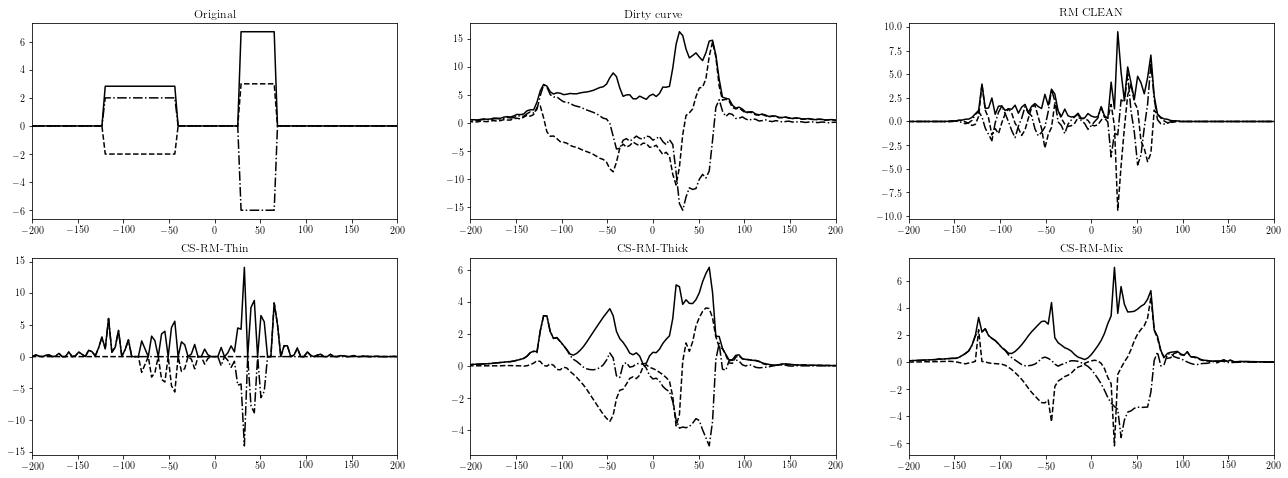

In [9]:
#We plot the results
f, axarr = plt.subplots(2, 3)

axarr[0,0].plot(phi, np.abs(F), 'k-')
axarr[0,0].plot(phi, F.real, 'k-.')
axarr[0,0].plot(phi, F.imag, 'k--')
axarr[0,0].set_ylim([None, None])
axarr[0,0].set_xlim([-200, 200])
axarr[0,0].set(title='Original')

axarr[0,1].plot(phi, np.abs(F_dirty), 'k-')
axarr[0,1].plot(phi, F_dirty.real, 'k-.')
axarr[0,1].plot(phi, F_dirty.imag, 'k--')
axarr[0,1].set_ylim([None, None])
axarr[0,1].set_xlim([-200, 200])
axarr[0,1].set(title='Dirty curve')

axarr[0,2].plot(phi, np.abs(F_recon_rmclean), 'k-')
axarr[0,2].plot(phi, F_recon_rmclean.real, 'k-.')
axarr[0,2].plot(phi, F_recon_rmclean.imag, 'k--')
axarr[0,2].set_ylim([None, None])
axarr[0,2].set_xlim([-200, 200])
axarr[0,2].set(title='RM CLEAN')

axarr[1,0].plot(phi, np.abs(F_recon_thin), 'k-')
axarr[1,0].plot(phi, F_recon_thin.real, 'k-.')
axarr[1,0].plot(phi, F_recon_thin.imag, 'k--')
axarr[1,0].set_ylim([None, None])
axarr[1,0].set_xlim([-200, 200])
axarr[1,0].set(title='CS-RM-Thin')

axarr[1,1].plot(phi, np.abs(F_recon_thick), 'k-')
axarr[1,1].plot(phi, F_recon_thick.real, 'k-.')
axarr[1,1].plot(phi, F_recon_thick.imag, 'k--')
axarr[1,1].set_ylim([None, None])
axarr[1,1].set_xlim([-200, 200])
axarr[1,1].set(title='CS-RM-Thick')


axarr[1,2].plot(phi, np.abs(F_recon_mix), 'k-')
axarr[1,2].plot(phi, F_recon_mix.real, 'k-.')
axarr[1,2].plot(phi, F_recon_mix.imag, 'k--')
axarr[1,2].set_ylim([None, None])
axarr[1,2].set_xlim([-200, 200])
axarr[1,2].set(title='CS-RM-Mix')

plt.subplots_adjust(right=3.0)
plt.subplots_adjust(top=2.0)
plt.subplots_adjust(bottom=0.5)

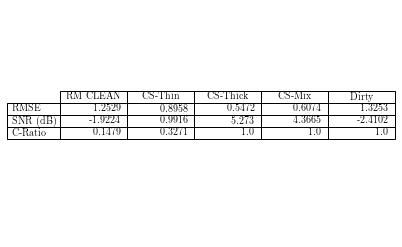

In [10]:
# Tables and plots for Real parts
fig, axs = plt.subplots(1,1)
plt.rcParams["figure.figsize"] = 30,8
collabel=("RM CLEAN", "CS-Thin", "CS-Thick", "CS-Mix", "Dirty")
rows = ("RMSE", "SNR (dB)", "C-Ratio")
data = np.zeros((3,5))

F_orig = F.real
F_rm_clean = F_recon_rmclean.real
F_thin = F_recon_thin.real
F_thick = F_recon_thick.real
F_mix = F_recon_mix.real
F_dirty_re = F_dirty.real

# RMSE

data[0,0] = RMSE(F_orig, F_rm_clean)
data[0,1] = RMSE(F_orig, F_thin)
data[0,2] = RMSE(F_orig, F_thick)
data[0,3] = RMSE(F_orig, F_mix)
data[0,4] = RMSE(F_orig, F_dirty_re)

# SNR

data[1,0] = SNR(F_orig, F_rm_clean)
data[1,1] = SNR(F_orig, F_thin)
data[1,2] = SNR(F_orig, F_thick)
data[1,3] = SNR(F_orig, F_mix)
data[1,4] = SNR(F_orig, F_dirty_re)

# Compressibility Ratio

data[2,0] = CompressibilityRatio(F_rm_clean)
data[2,1] = CompressibilityRatio(F_thin)
data[2,2] = CompressibilityRatio(F_thick)
data[2,3] = CompressibilityRatio(F_mix)
data[2,4] = CompressibilityRatio(F_dirty_re)

axs.axis('tight')
axs.axis('off')

data = np.round(data, 4)
the_table = axs.table(cellText=data, rowLabels=rows, colLabels=collabel,loc='center')

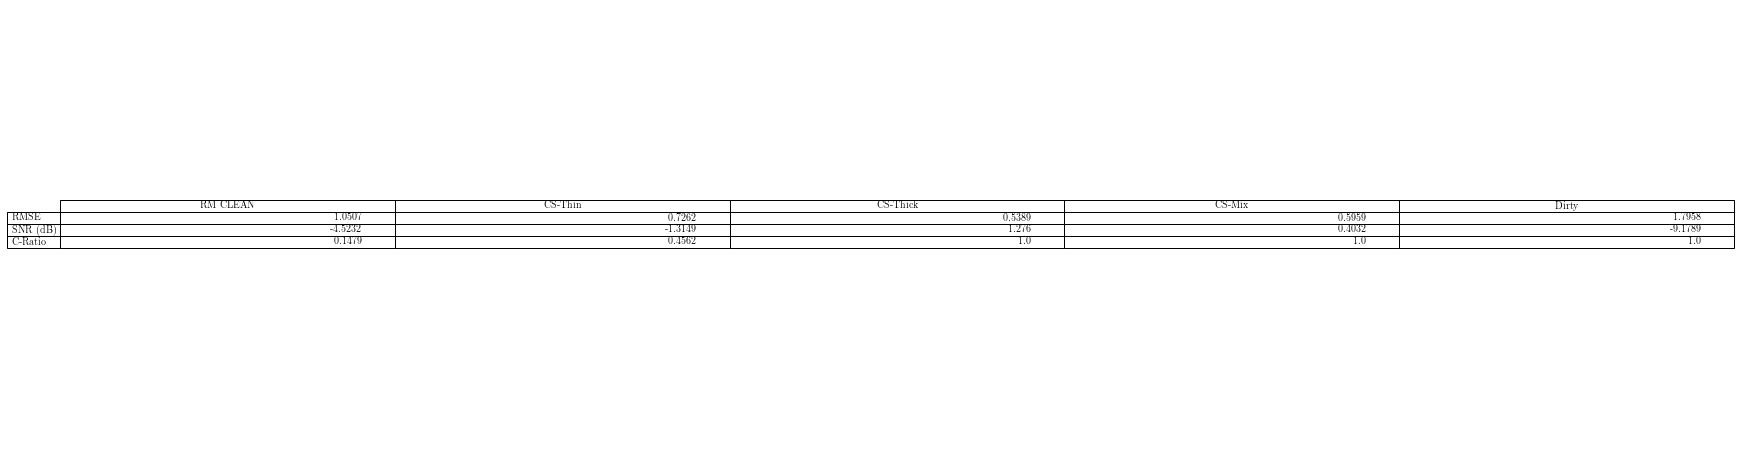

In [11]:
# Tables and plots for Imaginary parts
fig, axs = plt.subplots(1,1)
plt.rcParams["figure.figsize"] = 10,10
collabel=("RM CLEAN", "CS-Thin", "CS-Thick", "CS-Mix", "Dirty")
rows = ("RMSE", "SNR (dB)", "C-Ratio")
data = np.zeros((3,5))

F_orig = F.imag
F_rm_clean = F_recon_rmclean.imag
F_thin = F_recon_thin.imag
F_thick = F_recon_thick.imag
F_mix = F_recon_mix.imag
F_dirty_img = F_dirty.imag

# RMSE

data[0,0] = RMSE(F_orig, F_rm_clean)
data[0,1] = RMSE(F_orig, F_thin)
data[0,2] = RMSE(F_orig, F_thick)
data[0,3] = RMSE(F_orig, F_mix)
data[0,4] = RMSE(F_orig, F_dirty_img)

# SNR

data[1,0] = SNR(F_orig, F_rm_clean)
data[1,1] = SNR(F_orig, F_thin)
data[1,2] = SNR(F_orig, F_thick)
data[1,3] = SNR(F_orig, F_mix)
data[1,4] = SNR(F_orig, F_dirty_img)

# Compressibility Ratio

data[2,0] = CompressibilityRatio(F_rm_clean)
data[2,1] = CompressibilityRatio(F_thin)
data[2,2] = CompressibilityRatio(F_thick)
data[2,3] = CompressibilityRatio(F_mix)
data[2,4] = CompressibilityRatio(F_dirty_img)

axs.axis('tight')
axs.axis('off')

data = np.round(data, 4)
the_table = axs.table(cellText=data, rowLabels=rows, colLabels=collabel,loc='center')

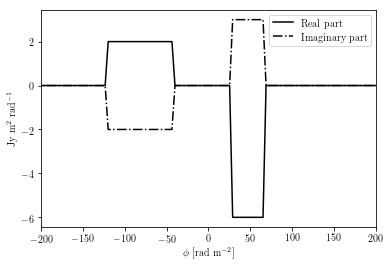

In [19]:
plt.plot(phi, F.real, 'k-')
plt.plot(phi, F.imag, 'k-.')
plt.xlabel(r"$\phi$ [rad m$^{-2}$]")
plt.ylabel(r'Jy m$^2$ rad$^{-1}$')
plt.ylim([None, None])
plt.xlim([-200, 200])
plt.legend((r"Real part", r"Imaginary part"), loc='upper right')

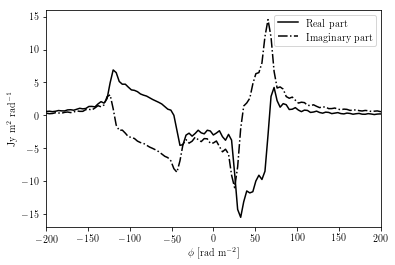

In [20]:
#plt.plot(phi, np.abs(F), 'k-')
plt.plot(phi, F_dirty.real, 'k-')
plt.plot(phi, F_dirty.imag, 'k-.')
plt.xlabel(r"$\phi$ [rad m$^{-2}$]")
plt.ylabel(r'Jy m$^2$ rad$^{-1}$')
plt.ylim([None, None])
plt.xlim([-200, 200])
plt.legend((r"Real part", r"Imaginary part"), loc='upper right')

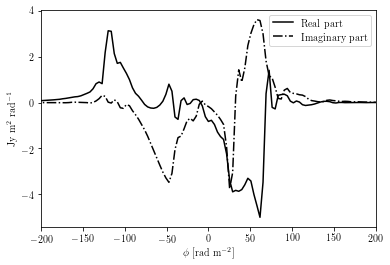

In [21]:
#plt.plot(phi, np.abs(F), 'k-')
plt.plot(phi, F_recon_thick.real, 'k-')
plt.plot(phi, F_recon_thick.imag, 'k-.')
plt.xlabel(r"$\phi$ [rad m$^{-2}$]")
plt.ylabel(r'Jy m$^2$ rad$^{-1}$')
plt.ylim([None, None])
plt.xlim([-200, 200])
plt.legend((r"Real part", r"Imaginary part"), loc='upper right')

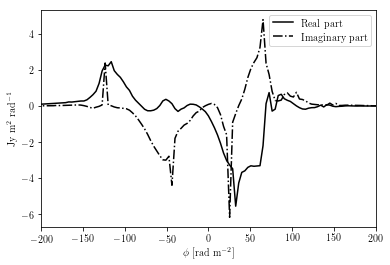

In [22]:
#plt.plot(phi, np.abs(F), 'k-')
plt.plot(phi, F_recon_mix.real, 'k-')
plt.plot(phi, F_recon_mix.imag, 'k-.')
plt.xlabel(r"$\phi$ [rad m$^{-2}$]")
plt.ylabel(r'Jy m$^2$ rad$^{-1}$')
plt.ylim([None, None])
plt.xlim([-200, 200])
plt.legend((r"Real part", r"Imaginary part"), loc='upper right')

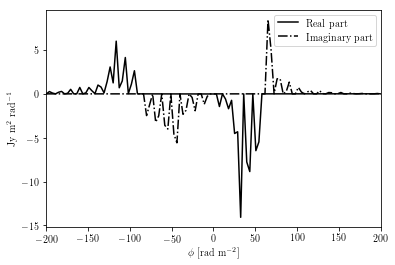

In [23]:
#plt.plot(phi, np.abs(F), 'k-')
plt.plot(phi, F_recon_thin.real, 'k-')
plt.plot(phi, F_recon_thin.imag, 'k-.')
plt.xlabel(r"$\phi$ [rad m$^{-2}$]")
plt.ylabel(r'Jy m$^2$ rad$^{-1}$')
plt.ylim([None, None])
plt.xlim([-200, 200])
plt.legend((r"Real part", r"Imaginary part"), loc='upper right')